In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
from google.colab import files
files.upload()

Saving Covid cases in India.csv to Covid cases in India.csv


{'Covid cases in India.csv': b'S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths\r\n1,Andhra Pradesh,14,0,1,0\r\n,Andaman and Nicobar Islands,6,0,0,0\r\n2,Bihar,9,0,0,1\r\n20,Chandigarh,8,0,0,0\r\n3,Chattisgarh,6,0,0,0\r\n4,Delhi,38,1,6,1\r\n,Goa,3,0,0,0\r\n5,Gujarat,44,1,0,3\r\n6,Haryana,19,14,12,0\r\n7,Himachal Pradesh,3,0,0,1\r\n21,Jammu and Kashmir,20,0,1,1\r\n8,Karnataka,55,0,3,2\r\n9,Kerala,168,8,11,0\r\n22,Ladakh,13,0,3,0\r\n10,Madhya Pradesh,30,0,0,2\r\n11,Maharashtra,177,3,25,5\r\n12,Manipur,1,0,0,0\r\n13,Mizoram,1,0,0,0\r\n14,Odisha,3,0,0,0\r\n15,Pondicherry,1,0,0,0\r\n16,Punjab,38,0,1,1\r\n17,Rajasthan,52,2,3,0\r\n18,Tamil Nadu,34,6,2,1\r\n19,Telengana,46,10,1,0\r\n24,Uttarakhand,4,1,0,0\r\n23,Uttar Pradesh,54,1,11,0\r\n25,West Bengal,15,0,0,1'}

In [0]:
from google.colab import files 
files.upload()

Saving per_day_cases.xlsx to per_day_cases.xlsx


{'per_day_cases.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xc7z\x97\x90u\x01\x00\x00 \x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [0]:
df1 = pd.read_excel('per_day_cases.xlsx')


In [0]:
df = pd.read_csv('Covid cases in India.csv')


In [0]:
df.drop(columns='S. No.',inplace=True)

In [0]:
df.rename(columns={'Name of State / UT':'State','Cured/Discharged/Migrated':'Recovered'},inplace=True)


In [0]:
df.head()

,State,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Recovered,Deaths
0,Andhra Pradesh,14,0,1,0
1,Andaman and Nicobar Islands,6,0,0,0
2,Bihar,9,0,0,1
3,Chandigarh,8,0,0,0
4,Chattisgarh,6,0,0,0


In [0]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [0]:
df['Active cases'] = df['Total cases'] - df['Deaths'] - df['Recovered']

In [0]:
df.sort_values(['Active cases'],ascending = False ,inplace=True)

In [0]:
sns.set(style='darkgrid',font_scale=1.2)
b = df.groupby(['State'])['Recovered'].sum().sort_values(ascending=False).to_frame()
b.style.background_gradient(cmap='Greens')


,Recovered
State,
Maharashtra,25
Haryana,12
Kerala,11
Uttar Pradesh,11
Delhi,6
Ladakh,3
Rajasthan,3
Karnataka,3
Tamil Nadu,2


In [0]:
c = df.groupby(['State'])['Deaths'].sum().sort_values(ascending=False).to_frame()
c.style.background_gradient(cmap='Reds')

,Deaths
State,
Maharashtra,5
Gujarat,3
Madhya Pradesh,2
Karnataka,2
West Bengal,1
Jammu and Kashmir,1
Bihar,1
Tamil Nadu,1
Punjab,1


In [0]:
sns.set(style='darkgrid',font_scale=1.2)
a = df.groupby(['State'])['Active cases'].sum().sort_values(ascending = False).to_frame()
a.style.background_gradient(cmap='Blues')

,Active cases
State,
Kerala,165
Maharashtra,150
Telengana,55
Rajasthan,51
Karnataka,50
Uttar Pradesh,44
Gujarat,42
Tamil Nadu,37
Punjab,36


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

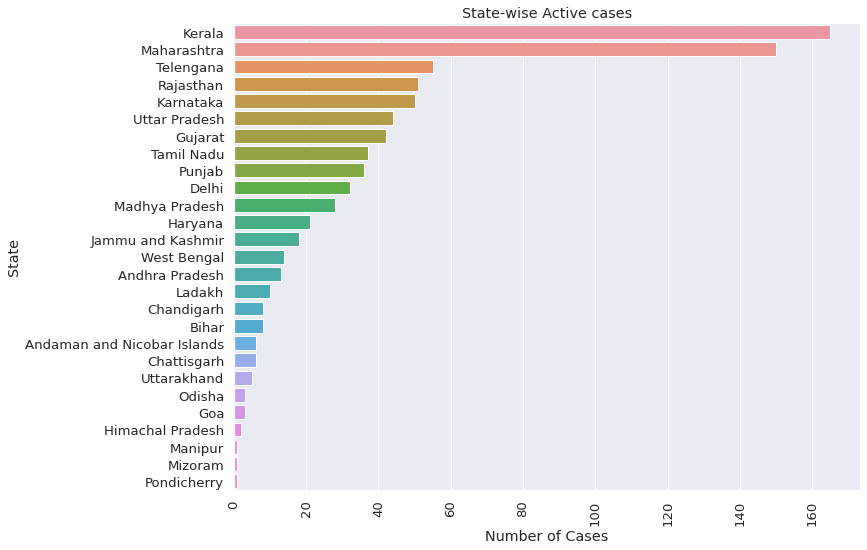

In [0]:
plt.figure(figsize=[10,8])
sns.barplot(df['Active cases'],df['State'])
plt.xlabel('Number of Cases')
plt.ylabel('State')
plt.title('State-wise Active cases')
plt.xticks(rotation=90)

In [0]:
df1.rename(columns={'Name of State / UT':'State'},inplace=True)
df1.drop(columns='Unnamed: 3',inplace=True)


KeyError: ignored

In [0]:
df1.head(2)

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN


In [0]:
India = df['Total Confirmed cases (Indian National)'].sum()
Foreign = df['Total Confirmed cases ( Foreign National )'].sum()
dict = {'India':India , 'Foreigners':Foreign}


Text(0.5, 1.0, 'Confirmed cases : Indian National vs Foreign National')

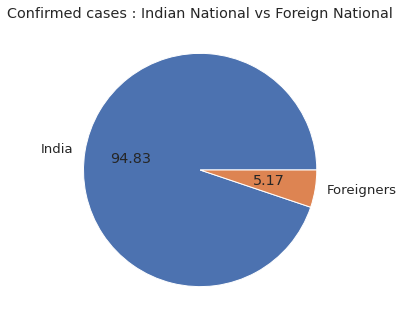

In [0]:
plt.figure(figsize=[5,5])
plt.pie(dict.values() ,labels=dict.keys() ,autopct='%.2f')
plt.title('Confirmed cases : Indian National vs Foreign National')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text major ticklabel objects>)

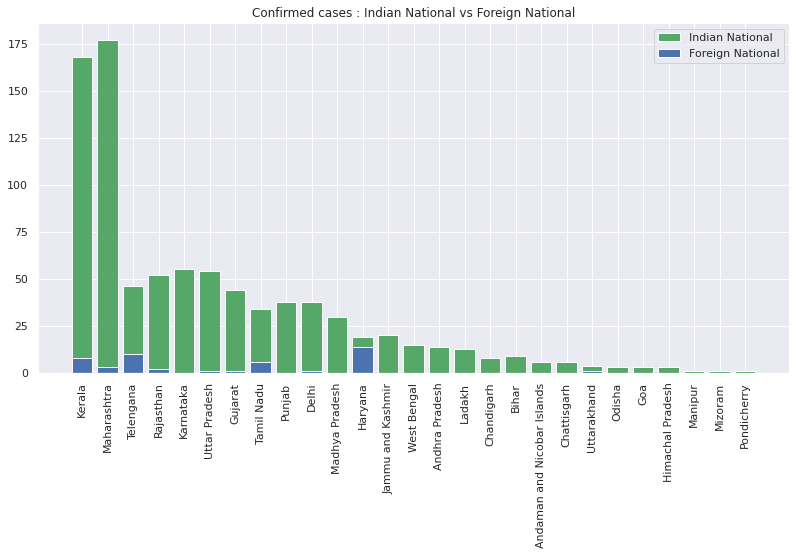

In [0]:
plt.figure(figsize=[12,6])
sns.set(style='darkgrid',font_scale=1)
plt.bar(df['State'],df['Total Confirmed cases (Indian National)'],color='g')
plt.bar(df['State'],df['Total Confirmed cases ( Foreign National )'],color='b')
plt.legend(labels =['Indian National','Foreign National'])
plt.title('Confirmed cases : Indian National vs Foreign National')
plt.xticks(rotation=90)

In [0]:
df1.head(2)

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN


In [0]:
Date = pd.to_datetime(df1['Date'])

In [0]:
date = Date.dt.strftime("%m-%d")

In [0]:
active = df1['Active']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 <a list of 59 Text major ticklabel objects>)

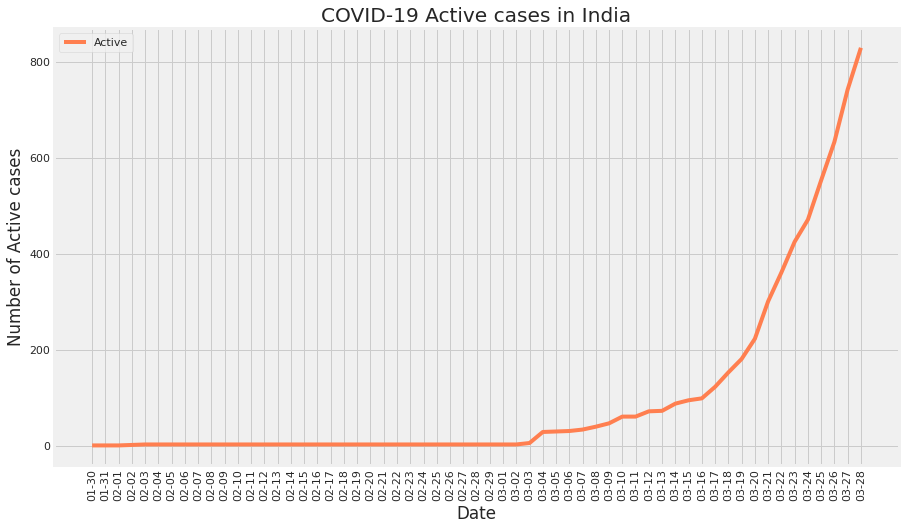

In [0]:
plt.figure(figsize=[13.5,7.5])
plt.style.use('fivethirtyeight')
sns.lineplot(x=date,y=active,label='Active',markers=True,color='coral')
plt.xlabel('Date')
plt.ylabel('Number of Active cases')
plt.title('COVID-19 Active cases in India')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 <a list of 59 Text major ticklabel objects>)

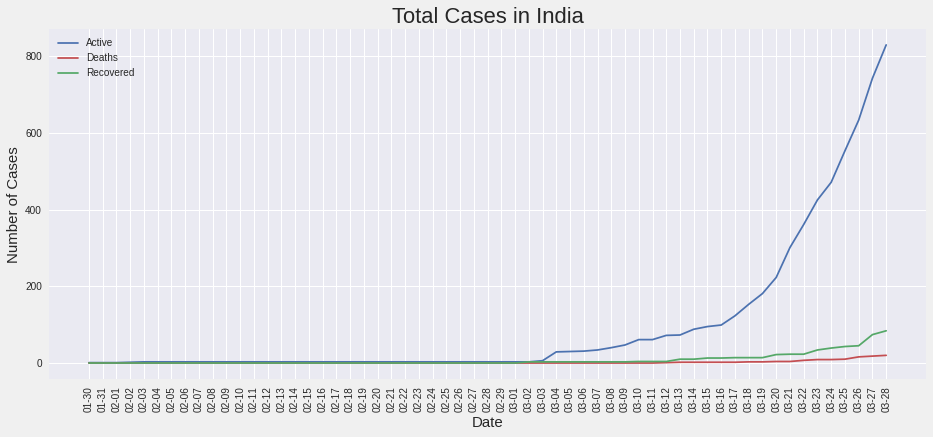

In [0]:
plt.figure(figsize=[14,6])
plt.style.use('seaborn')
sns.lineplot(x=date,y=active,label='Active',markers=True,color='b')
sns.lineplot(x=date,y=df1['Deaths'],label='Deaths',markers=True,color='r')
sns.lineplot(x=date,y=df1['Recovered'],label='Recovered',markers=True,color='g')
plt.legend(loc='upper left')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of Cases',fontsize=15)
plt.title('Total Cases in India',fontsize=22)
plt.xticks(rotation=90)

In [0]:
df1.head(2)

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 <a list of 59 Text major ticklabel objects>)

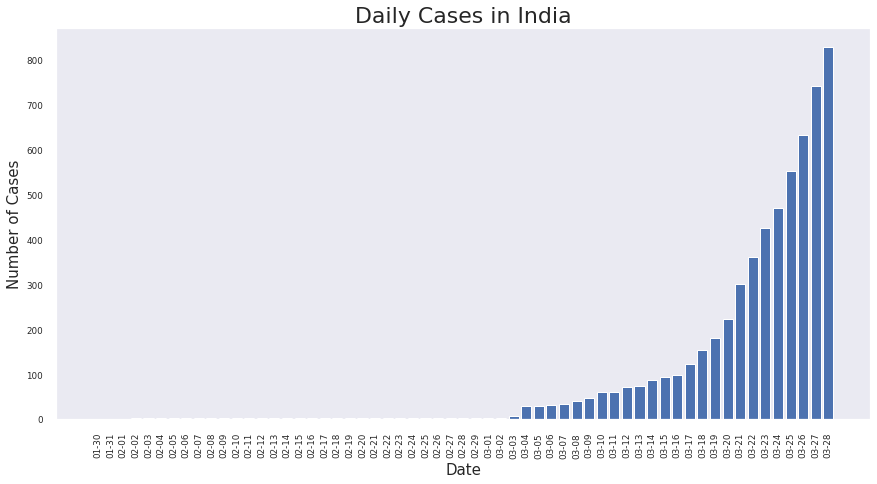

In [0]:
plt.figure(figsize=[13,6.7])
sns.set(style='dark',font_scale=0.8)

plt.bar(date,active,color='b')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of Cases',fontsize=15)
plt.title('Daily Cases in India',fontsize=22)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58],
 <a list of 59 Text major ticklabel objects>)

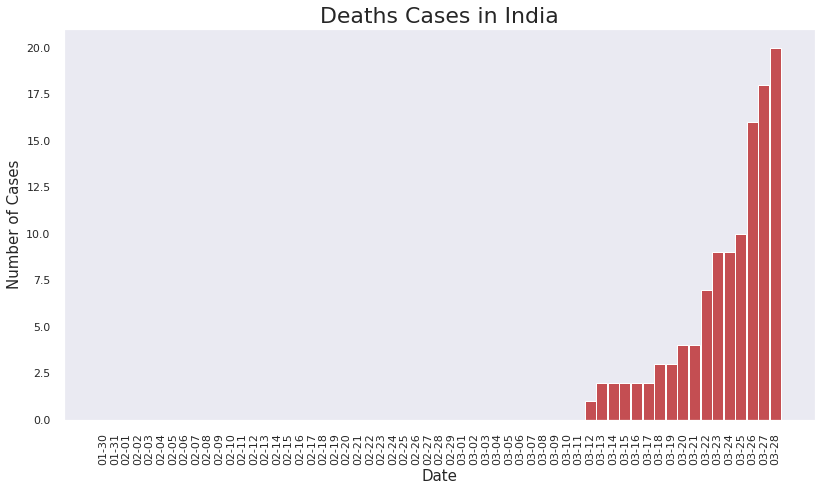

In [0]:
plt.figure(figsize=[12,6.7])
sns.set(style='dark',font_scale=1)

plt.bar(date,df1['Deaths'],color='r',width=0.95)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of Cases',fontsize=15)
plt.title('Deaths Cases in India',fontsize=22)
plt.xticks(rotation=90)